In [1]:
from __future__ import print_function
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


print(__doc__)


Automatically created module for IPython interactive environment


In [ ]:
from statsmodels.stats.weightstats import _zconfint_generic

In [2]:
# # Loading the Digits dataset
# digits = datasets.load_digits()

# # To apply an classifier on this data, we need to flatten the image, to
# # turn the data in a (samples, feature) matrix:
# n_samples = len(digits.images)
# X = digits.images.reshape((n_samples, -1))
# y = digits.target
dataset=np.loadtxt('transfusion.txt', delimiter=',', dtype=str, )
dataset=[[float(n) for n in e] for e in dataset]
X=[]
y=[]
for row in dataset:
    X.append(row[:4])
    y.append(int(row[4]))
X=np.array(X)
y=np.array(y)

In [3]:
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

scores = ['precision', 'recall', 'f1', 'accuracy', 'roc_auc']


In [4]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring= score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.231 (+/-0.408) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.301 (+/-0.800) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.510 (+/-0.127) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.157 (+/-0.270) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.417 (+/-0.199) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.428 (+/-0.182) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.359 (+/-0.244) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.460 (+/-0.130) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.82      0.90      0.86       285
          1       0.54      0.37      0.44        89

avg / total       0.75      0.78      0.76       374


# T

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.086 (+/-0.148) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.041 (+/-0.101) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.349 (+/-0.073) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.080 (+/-0.140) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.309 (+/-0.202) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.262 (+/-0.145) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.292 (+/-0.206) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.320 (+/-0.108) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.82      0.90      0.86       285
          1       0.54      0.37      0.44        89

avg / total       0.75      0.78      0.76       374


# T

In [5]:
# Split the dataset in two equal parts
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.5, random_state=0)
# scores = ['precision', 'recall', 'f1']
# Set the parameters by cross-validation
tuned_parameters = [{'penalty': ['l1'],'solver': ['liblinear'], 'tol': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]



for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(LogisticRegression(C=1), tuned_parameters, cv=5,
                       scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}

Grid scores on development set:

0.566 (+/-0.777) for {'C': 1, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}
0.549 (+/-0.800) for {'C': 1, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}
0.549 (+/-0.800) for {'C': 10, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}
0.549 (+/-0.800) for {'C': 10, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}
0.549 (+/-0.800) for {'C': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}
0.549 (+/-0.800) for {'C': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}
0.549 (+/-0.800) for {'C': 1000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}
0.549 (+/-0.800) for {'C': 1000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluat

In [6]:

# Set the parameters by cross-validation
tuned_parameters = [{'n_neighbors': [1, 2, 3, 4, 5, 6,7,8,9],'weights': ['uniform'], 'algorithm': ['ball_tree']},
                    {'n_neighbors': [1, 2, 3, 4, 5, 6,7,8,9],'weights': ['uniform'], 'algorithm': ['kd_tree']},
                    {'n_neighbors': [1, 2, 3, 4, 5, 6,7,8,9],'weights': ['uniform'], 'algorithm': ['brute']}]


for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(KNeighborsClassifier(n_neighbors=1), tuned_parameters, cv=5,
                       scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'algorithm': 'ball_tree', 'n_neighbors': 8, 'weights': 'uniform'}

Grid scores on development set:

0.282 (+/-0.182) for {'algorithm': 'ball_tree', 'n_neighbors': 1, 'weights': 'uniform'}
0.409 (+/-0.272) for {'algorithm': 'ball_tree', 'n_neighbors': 2, 'weights': 'uniform'}
0.415 (+/-0.093) for {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'uniform'}
0.307 (+/-0.432) for {'algorithm': 'ball_tree', 'n_neighbors': 4, 'weights': 'uniform'}
0.389 (+/-0.182) for {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'uniform'}
0.196 (+/-0.391) for {'algorithm': 'ball_tree', 'n_neighbors': 6, 'weights': 'uniform'}
0.403 (+/-0.331) for {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'uniform'}
0.494 (+/-0.851) for {'algorithm': 'ball_tree', 'n_neighbors': 8, 'weights': 'uniform'}
0.443 (+/-0.669) for {'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'uniform'}
0.284 (+/-0.178) fo

Best parameters set found on development set:

{'algorithm': 'ball_tree', 'n_neighbors': 2, 'weights': 'uniform'}

Grid scores on development set:

0.668 (+/-0.095) for {'algorithm': 'ball_tree', 'n_neighbors': 1, 'weights': 'uniform'}
0.749 (+/-0.041) for {'algorithm': 'ball_tree', 'n_neighbors': 2, 'weights': 'uniform'}
0.735 (+/-0.044) for {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'uniform'}
0.743 (+/-0.040) for {'algorithm': 'ball_tree', 'n_neighbors': 4, 'weights': 'uniform'}
0.730 (+/-0.067) for {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'uniform'}
0.738 (+/-0.048) for {'algorithm': 'ball_tree', 'n_neighbors': 6, 'weights': 'uniform'}
0.738 (+/-0.089) for {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'uniform'}
0.746 (+/-0.064) for {'algorithm': 'ball_tree', 'n_neighbors': 8, 'weights': 'uniform'}
0.746 (+/-0.062) for {'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'uniform'}
0.671 (+/-0.088) for {'algorithm': 'kd_tree', 'n_neighbors':

In [7]:
tuned_parameters = [{'max_depth': [2,3,4,5,6,7],'criterion': ['gini']},
                    {'max_depth': [2,3,4,5,6,7],'criterion': ['entropy']}]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=5,
                       scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)




{'criterion': 'gini', 'max_depth': 3}

Grid scores on development set:

0.166 (+/-0.421) for {'criterion': 'gini', 'max_depth': 2}
0.588 (+/-0.447) for {'criterion': 'gini', 'max_depth': 3}
0.432 (+/-0.216) for {'criterion': 'gini', 'max_depth': 4}
0.456 (+/-0.400) for {'criterion': 'gini', 'max_depth': 5}
0.448 (+/-0.418) for {'criterion': 'gini', 'max_depth': 6}
0.364 (+/-0.141) for {'criterion': 'gini', 'max_depth': 7}
0.166 (+/-0.421) for {'criterion': 'entropy', 'max_depth': 2}
0.588 (+/-0.447) for {'criterion': 'entropy', 'max_depth': 3}
0.437 (+/-0.262) for {'criterion': 'entropy', 'max_depth': 4}
0.433 (+/-0.310) for {'criterion': 'entropy', 'max_depth': 5}
0.498 (+/-0.312) for {'criterion': 'entropy', 'max_depth': 6}
0.410 (+/-0.099) for {'criterion': 'entropy', 'max_depth': 7}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

         

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



0.308 (+/-0.232) for {'criterion': 'entropy', 'max_depth': 4}
0.345 (+/-0.322) for {'criterion': 'entropy', 'max_depth': 5}
0.386 (+/-0.182) for {'criterion': 'entropy', 'max_depth': 6}
0.336 (+/-0.128) for {'criterion': 'entropy', 'max_depth': 7}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.82      0.89      0.85       285
          1       0.52      0.39      0.45        89

avg / total       0.75      0.77      0.76       374


# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 3}

Grid scores on development set:

0.757 (+/-0.018) for {'criterion': 'gini', 'max_depth': 2}
0.765 (+/-0.030) for {'criterion': 'gini', 'max_depth': 3}
0.749 (+/-0.050) for {'criterion': 'gini', 'max_depth': 4}
0.754 (+/-0.110) for {'criterion': 'gini', 'max_depth': 5}
0.7

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve, classification_report, roc_curve

In [26]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

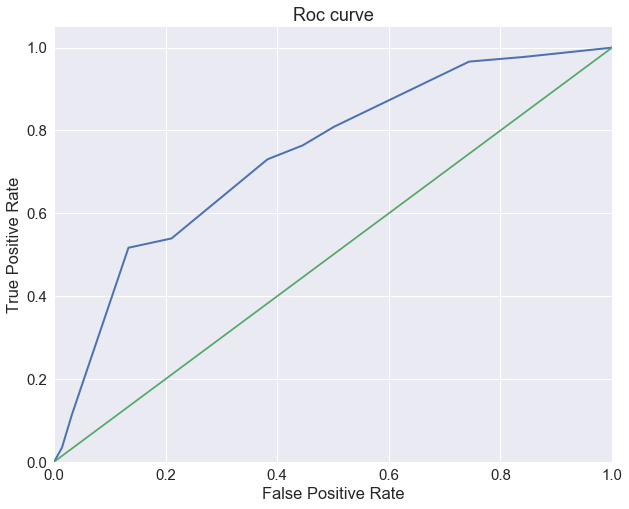

In [31]:
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label=1)
lw=2
plt.plot(fpr, tpr, lw=lw, label='Roc curve')
plt.plot([0,1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.savefig("Roc.png")
plt.show()